In [1]:
from Network import SVM
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import logging
logging.basicConfig(level=logging.WARN)

Done 0 training rounds (0 runs)
Done 40 training rounds (2000 runs)
Done 80 training rounds (4000 runs)
Done 120 training rounds (6000 runs)
Done 160 training rounds (8000 runs)
Done 200 training rounds (10000 runs)
Done 240 training rounds (12000 runs)
Done 280 training rounds (14000 runs)
Done 320 training rounds (16000 runs)
Done 360 training rounds (18000 runs)
Done 399 training rounds (19950 runs)


/Users/tom/anaconda3/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


Value: 1.49193200981, Grad: 0
Value: 0.567396230507, Grad: -0.0 (a)
Value: 2.62943588554, Grad: 0.0 (x)
Value: 0.958142690766, Grad: 0
Value: 0.300979814946, Grad: 0.0 (b)
Value: 3.18341178772, Grad: 0.0 (y)
Value: 3.55007470058, Grad: 0
Value: 1.0999999999999999, Grad: 0 (c)


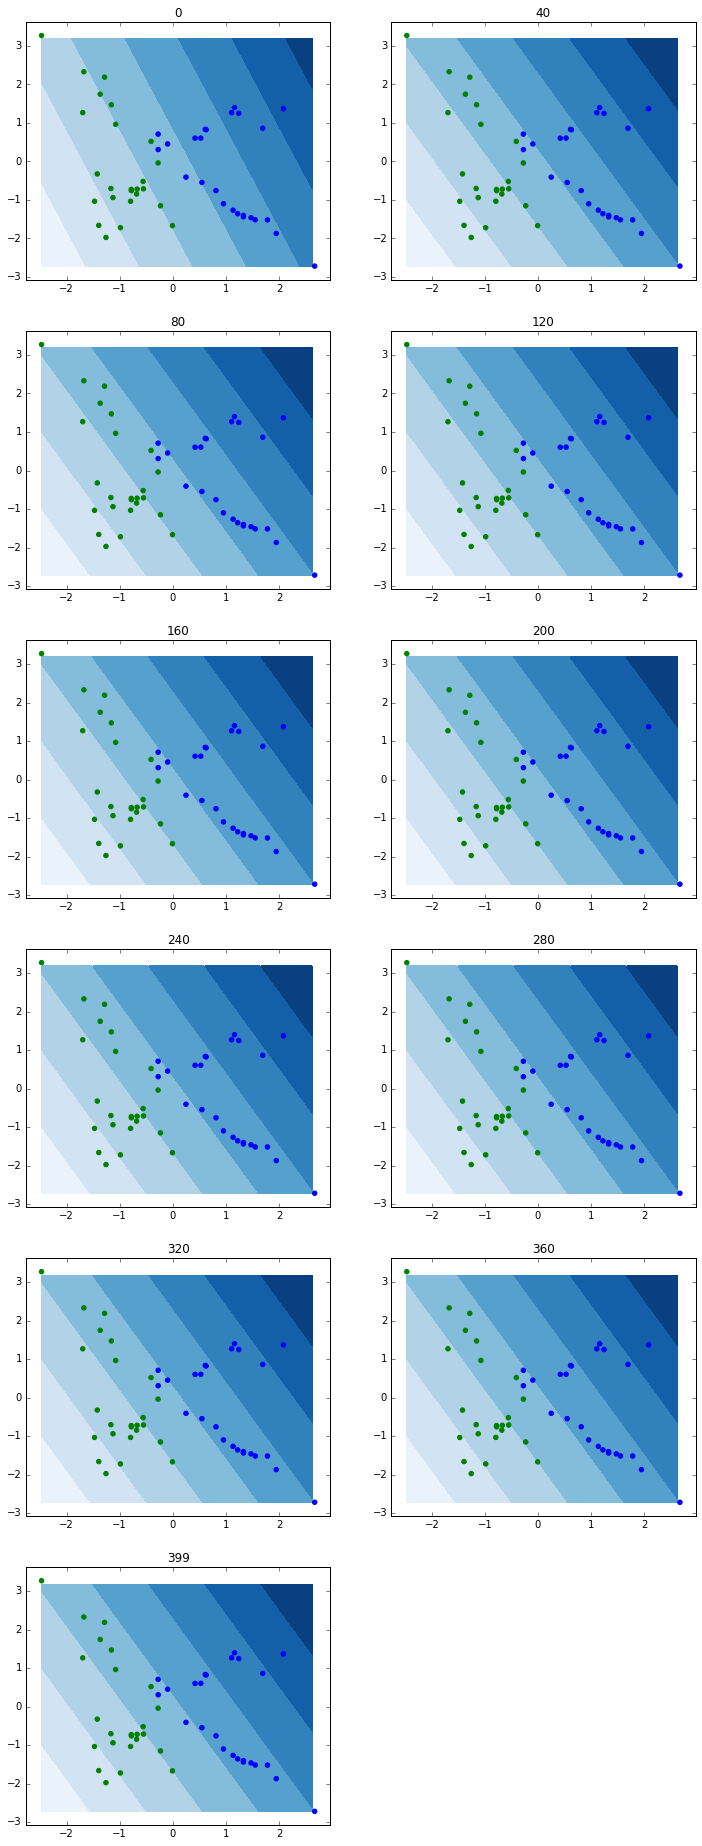

In [7]:
svm = SVM()

data, labels = make_classification(50, 2, 2, 0)
colors = ['blue' if x else 'green' for x in labels]

def eval_model(data, labels, model):
    return sum([model.predict(*d) == l for d, l in zip(data, labels)]) * 100. / len(labels)

nplots = 10
niter = 400
plot_freq = niter // nplots

fsize = 6
fig = plt.figure(figsize=(fsize * 2, fsize*nplots))
pn = 1
for i in range(niter):
    # Train on all the data in this iteration
    for d, l in zip(data, labels):
        svm.train(*d, l)
    
    if i % plot_freq == 0 or i == niter - 1:
        print("Done %d training rounds (%i runs)" % (i, i * len(labels)))
        
        ax = fig.add_subplot(nplots + 1, 2, pn)
        
        pn += 1
        #print(eval_model(data, labels, svm), i)
        #print("  f(x, y) = %fx + %fy + %f" % (svm.a.value, svm.b.value, svm.c.value))

        x_min, y_min = data.min(0)
        x_max, y_max = data.max(0)
        h = 0.1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
        Z = np.array([svm.predict(x, y) for x, y in np.c_[xx.ravel(), yy.ravel()]])
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap='Blues')

        ax.scatter(*data.T, color=colors)
        ax.set_title("%d" % i)
fig.show()

svm.ucreator.print_nodes()